### Matches Review Demos

In [1]:
from __future__ import print_function
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

from ipywidgets import GridspecLayout
from ipywidgets import interact, interactive, fixed, interact_manual,Button,Layout
import ipywidgets as widgets


widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)



In [16]:
matches_df = pd.read_csv('data/matches_at_0.75_distance_filtered.csv')
unique_qs = matches_df['query_video'].unique()

In [17]:
def create_expanded_button(description, button_style):
    return Button(description=description, button_style=button_style, layout=Layout(height='auto', width='auto'))

In [32]:

import bqplot as bq

ModuleNotFoundError: No module named 'bqplot'

In [34]:
test_i = 255
print("QUERY VIDEO")
get_frame_summary(unique_qs[test_i])
msk = matches_df['query_video'] == unique_qs[test_i]
filtered = matches_df.loc[msk,:]

for i,match_video in enumerate(filtered['match_video']):
    print('MATCHED VIDEO {}/{}'.format(i+1,len(filtered['match_video'])))
    get_frame_summary(match_video)
    
    

QUERY VIDEO


NameError: name 'get_frame_summary' is not defined

In [35]:
matches_df['annotation_is_match'] = -1

In [36]:
matches_df['annotation_is_match'][0] = 1

/home/felipe/anaconda3/envs/winnow-gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
matches_df.head()

,Unnamed: 0,query,match,distance,query_video,match_video,self_match,unique_index,annotation_is_match
0,1,13,69,0.503098,e8d65df3237d41c5a57200da3a18916f.mp4,c6391a5642cc45d7a7db6ea6076aab80.mp4,False,1369,1
1,2,13,1533,0.539837,e8d65df3237d41c5a57200da3a18916f.mp4,c6552047e5d04833b8f8040f4bfa5ca6.mp4,False,131533,-1
2,3,13,1120,0.591593,e8d65df3237d41c5a57200da3a18916f.mp4,899781d1ec5c4bbc94e51918a7ecac62.mp4,False,131120,-1
3,4,13,1068,0.591779,e8d65df3237d41c5a57200da3a18916f.mp4,7fa5ede584714a619491c733f8005e2d.mp4,False,131068,-1
4,5,13,1382,0.605007,e8d65df3237d41c5a57200da3a18916f.mp4,4eb9ad34f1bd411485c373fb8cacb247.mp4,False,131382,-1


In [38]:
filtered.head()

NameError: name 'filtered' is not defined

In [41]:
info = ['query_video','match_video','distance','annotation_is_match'] 
for el in info:            
    print("{}:{}".format(el,filtered.iloc[i][el]))
    

def get_frame_summary(i):
    fp = unique_qs[i]
    FRAMES_PATH = os.path.join('data','representations','frame_level',fp+'_vgg_frames.npy')
    frames = np.load(FRAMES_PATH)
    plt.figure(figsize=(20,10))
    plt.imshow(np.hstack(frames[::5][:5]))
    plt.show()


NameError: name 'filtered' is not defined

In [42]:

from ipywidgets import fixed

In [43]:
a = create_expanded_button('Next Video', 'info')
b = create_expanded_button('Previous Video', 'info')
c = create_expanded_button('Next Query', 'info')
d = create_expanded_button('Previous Query', 'info')
e = create_expanded_button('Save', 'warning')
f = create_expanded_button('Match', 'success')
g = create_expanded_button('Not a Match', 'danger')
output = widgets.Output()
output_2 = widgets.Output()
output_desc = widgets.Output()
output_2_desc = widgets.Output()
global i,j,msk,filtered
i = 0 
j = 0

msk = matches_df['query_video'] == unique_qs[j]
filtered = matches_df.loc[msk]

def click_save(b):
    fn = 'manual_annotation.csv'
    matches_df.to_csv(fn)
    print("Saved on {}".format(fn))


def create_strip(frames,beg):
    
    plt.figure(figsize=(20,10))
    plt.imshow(np.hstack(frames[beg::5][:5]))
    plt.show()
    

def get_frame_summary(idx,video_list,beg=0):
    
    fp = video_list[idx]
    FRAMES_PATH = os.path.join('data','representations','frame_level',fp+'_vgg_frames.npy')
    frames = np.load(FRAMES_PATH)
#     create_strip(frames,beg)
    
    interact(create_strip,frames=fixed(frames),beg=(0,len(frames) // 5))
    
def display_row(out,info):

    with out:
        out.clear_output()
        info_var = ['query_video','match_video','distance','annotation_is_match']
        for el in info_var:
            
            print("{}:{}".format(el,info[el]))

def reset_current_video_match():
    with output:
        output.clear_output()
        global i,filtered
        i = 0
        print('Match Video - {} / {}'.format(i + 1,len(filtered)))
        get_frame_summary(i,filtered['match_video'].values)
        display_row(output_desc,filtered.iloc[i,:])
    
    
with output_2:
    print('Query Video - {} / {}'.format(j + 1,len(unique_qs)))
    get_frame_summary(j,unique_qs)
with output:
    print('Match Video - {} / {}'.format(i + 1,len(filtered)))
    get_frame_summary(i,filtered['match_video'].values)
    display_row(output_desc,filtered.iloc[i,:])

    
def move_video_match(inc):
    global i
    i+=inc
    i = max(0,i)
    i = min(len(filtered)-1,i)
    print('Match Video - {} / {}'.format(i + 1,len(filtered)))

def move_query_video(inc):
    global j,msk,filtered
    j+=inc
    j = max(0,j)
    j = min(len(unique_qs)-1,j)
    msk = matches_df['query_video'] == unique_qs[j]
    filtered = matches_df.loc[msk,:]
    print('Query Video - {} / {}'.format(j + 1,len(unique_qs)))

    
    
    
def on_button_clicked_is_match(b):
    with output:
        output.clear_output()
        global i,filtered
        original_index = filtered.index[i]
#         matches_df.loc[original_index,'annotation_is_match'] = 1
        move_video_match(1)
        get_frame_summary(i,filtered['match_video'].values)

    
    
def on_button_clicked_not_match(b):
    with output:
        output.clear_output()
        global i,filtered
        original_index = filtered.index[i]
#         matches_df.loc[original_index,'annotation_is_match'] = 0
        move_video_match(1)    
        get_frame_summary(i,filtered['match_video'].values)

def on_button_clicked_next_video_match(b):
    with output:
        output.clear_output()
        move_video_match(1)
        get_frame_summary(i,filtered['match_video'].values)
        display_row(output_desc,filtered.iloc[i,:])
        

def on_button_previous_video_match(b):
    with output:
        output.clear_output()
        move_video_match(-1)
        get_frame_summary(i,filtered['match_video'].values)
        display_row(output_desc,filtered.iloc[i,:])
        
        
def on_button_clicked_query(b):
    with output_2:
        output_2.clear_output()
        move_query_video(1)
        get_frame_summary(j,unique_qs)
        reset_current_video_match()
        
    

def on_button_previous_video_query(b):
    with output_2:
        output_2.clear_output()
        move_query_video(-1)
        get_frame_summary(j,unique_qs)
        reset_current_video_match()
        

a.on_click(on_button_clicked_next_video_match)
b.on_click(on_button_previous_video_match)
c.on_click(on_button_clicked_query)
d.on_click(on_button_previous_video_query)
g.on_click(on_button_clicked_not_match)
f.on_click(on_button_clicked_is_match)
e.on_click(click_save)

In [48]:
grid = GridspecLayout(8, 4, height='1000px')
# grid[:2, 0] = output_2_desc

grid[0,:] = output_desc
grid[1:3, :] = output_2
grid[3:5, :] = output

grid[5, 1] = g
grid[5, 2] = f

grid[6, 0] = d
grid[6, 1] = c
grid[6, 2] = b
grid[6, 3] = a
grid[7, 3] = e

grid

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001'), outputs=({'output_type': 'stream', 'text…

In [45]:
annotated = pd.read_csv('manual_annotation.csv')
annotated['annotation_is_match'].value_counts()

-1    1608
 1      17
Name: annotation_is_match, dtype: int64

In [46]:
matches_df.loc[:,['query_video','match_video','annotation_is_match']].head()

,query_video,match_video,annotation_is_match
0,e8d65df3237d41c5a57200da3a18916f.mp4,c6391a5642cc45d7a7db6ea6076aab80.mp4,1
1,e8d65df3237d41c5a57200da3a18916f.mp4,c6552047e5d04833b8f8040f4bfa5ca6.mp4,-1
2,e8d65df3237d41c5a57200da3a18916f.mp4,899781d1ec5c4bbc94e51918a7ecac62.mp4,-1
3,e8d65df3237d41c5a57200da3a18916f.mp4,7fa5ede584714a619491c733f8005e2d.mp4,-1
4,e8d65df3237d41c5a57200da3a18916f.mp4,4eb9ad34f1bd411485c373fb8cacb247.mp4,-1


In [138]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [4]:

with outdisplay(w)

IntSlider(value=0)

In [29]:
matches_df = pd.read_csv('data/matches_at_0.75_distance_filtered.csv')

In [30]:
matches_df.head()

,Unnamed: 0,query,match,distance,query_video,match_video,self_match,unique_index
0,1,13,69,0.503098,e8d65df3237d41c5a57200da3a18916f.mp4,c6391a5642cc45d7a7db6ea6076aab80.mp4,False,1369
1,2,13,1533,0.539837,e8d65df3237d41c5a57200da3a18916f.mp4,c6552047e5d04833b8f8040f4bfa5ca6.mp4,False,131533
2,3,13,1120,0.591593,e8d65df3237d41c5a57200da3a18916f.mp4,899781d1ec5c4bbc94e51918a7ecac62.mp4,False,131120
3,4,13,1068,0.591779,e8d65df3237d41c5a57200da3a18916f.mp4,7fa5ede584714a619491c733f8005e2d.mp4,False,131068
4,5,13,1382,0.605007,e8d65df3237d41c5a57200da3a18916f.mp4,4eb9ad34f1bd411485c373fb8cacb247.mp4,False,131382


In [31]:
matches_df.shape

(1625, 8)

In [32]:
matches_df['query_video'].nunique()

476

In [33]:
unique_qs = matches_df['query_video'].unique()

In [40]:

def get_frame_summary(i):
    fp = unique_qs[i]
    FRAMES_PATH = os.path.join('data','representations','frame_level',fp+'_vgg_frames.npy')
    frames = np.load(FRAMES_PATH)
    plt.figure(figsize=(20,10))
    plt.imshow(np.hstack(frames[::5][:5]))
    plt.show()
lw


In [299]:
@widgets.interact_manual(
    color=['blue', 'red', 'green'])

def plot(freq=1., color='blue', lw=2, grid=True):
    t = np.linspace(-1., +1., 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            lw=lw, color=color)
    ax.grid(grid)

interactive(children=(FloatSlider(value=1.0, description='freq', max=3.0, min=-1.0), Dropdown(description='col…

In [41]:
def browse_images(unique_qs):
    n = len(unique_qs)
#     def view_image(i):
#         plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
#         plt.title('Training: %s' % digits.target[i])
#         plt.show()
    
    interact(get_frame_summary, i=(0,n-1))

In [42]:
browse_images(unique_qs)

interactive(children=(IntSlider(value=237, description='i', max=475), Output()), _dom_classes=('widget-interac…

QUERY VIDEO


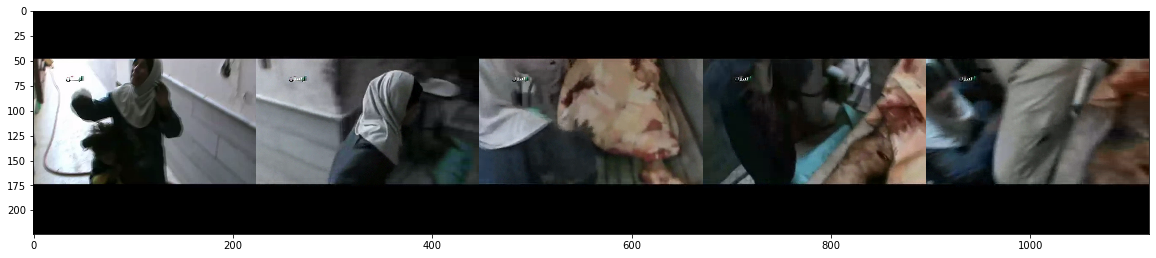

In [37]:
test_i = 255
print("QUERY VIDEO")
a = get_frame_summary(unique_qs[test_i])


QUERY VIDEO


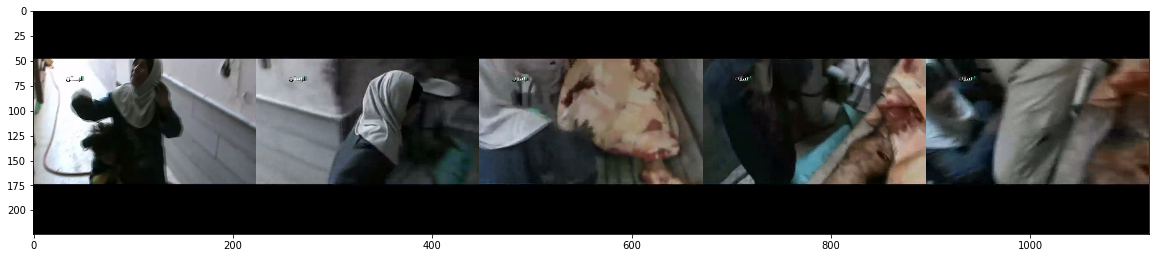

MATCHED VIDEO 1/2


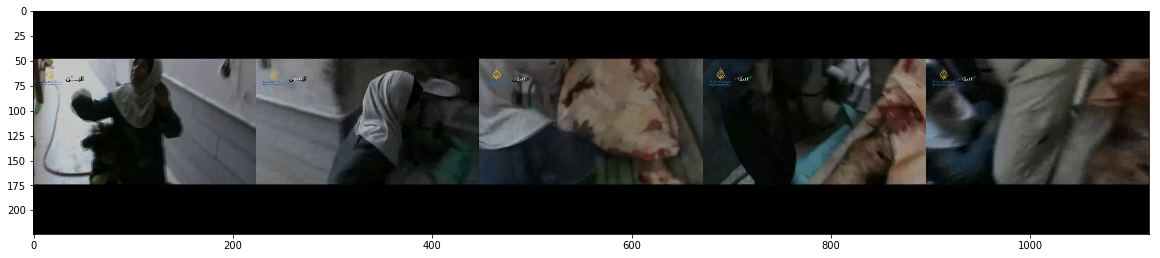

MATCHED VIDEO 2/2


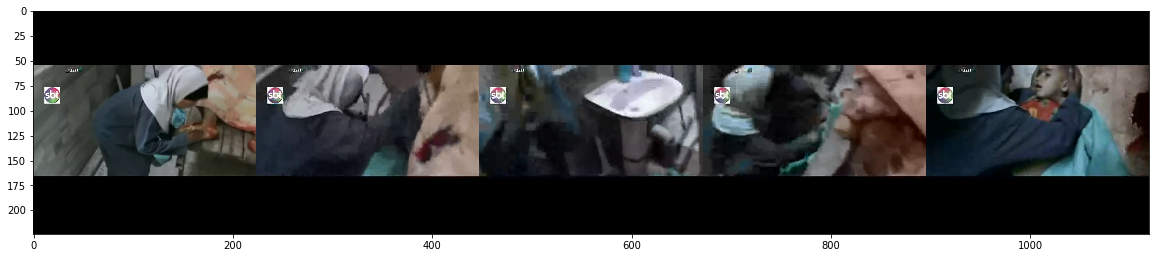

In [30]:
test_i = 255
print("QUERY VIDEO")
get_frame_summary(unique_qs[test_i])
msk = matches_df['query_video'] == unique_qs[test_i]
filtered = matches_df.loc[msk,:]

for i,match_video in enumerate(filtered['match_video']):
    print('MATCHED VIDEO {}/{}'.format(i+1,len(filtered['match_video'])))
    get_frame_summary(match_video)
    
    


In [9]:
filtered


,Unnamed: 0,query,match,distance,query_video,match_video,self_match,unique_index
0,1,13,69,0.503098,e8d65df3237d41c5a57200da3a18916f.mp4,c6391a5642cc45d7a7db6ea6076aab80.mp4,False,1369
1,2,13,1533,0.539837,e8d65df3237d41c5a57200da3a18916f.mp4,c6552047e5d04833b8f8040f4bfa5ca6.mp4,False,131533
2,3,13,1120,0.591593,e8d65df3237d41c5a57200da3a18916f.mp4,899781d1ec5c4bbc94e51918a7ecac62.mp4,False,131120
3,4,13,1068,0.591779,e8d65df3237d41c5a57200da3a18916f.mp4,7fa5ede584714a619491c733f8005e2d.mp4,False,131068
4,5,13,1382,0.605007,e8d65df3237d41c5a57200da3a18916f.mp4,4eb9ad34f1bd411485c373fb8cacb247.mp4,False,131382
5,6,13,281,0.618394,e8d65df3237d41c5a57200da3a18916f.mp4,18f75a94043140d0a10bfdb3b0c8c027.mp4,False,13281
6,7,13,1827,0.621171,e8d65df3237d41c5a57200da3a18916f.mp4,4efb1f54613b4dbb88c955cf8634a789.mp4,False,131827
7,8,13,188,0.635841,e8d65df3237d41c5a57200da3a18916f.mp4,19fa48bf09544f80a7953a3f5240f704.mp4,False,13188
8,9,13,255,0.640597,e8d65df3237d41c5a57200da3a18916f.mp4,8f3baa357dde4442adb69abe786ded34.mp4,False,13255
9,10,13,143,0.645605,e8d65df3237d41c5a57200da3a18916f.mp4,17f60675f799466d85fad43d6a9ec475.mp4,False,13143
